In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("superstore.csv")
df.columns



Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [8]:
key_columns = ['Order.ID', 'Order.Date', 'Region', 'Category', 'Sales', 'Profit', 'Quantity', 'Segment']
df_key = df[key_columns]
df_key.to_csv('key_columns.csv', index=False)


In [20]:
summary_by_region = df_key.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Average_Profit=('Profit', 'mean'),
    Order_Count=('Order.ID', 'nunique')
).reset_index()
summary_by_region


,Region,Total_Sales,Average_Profit,Order_Count
0,Africa,783776,19.374674,2232
1,Canada,66932,46.399453,201
2,Caribbean,324281,20.456403,855
3,Central,2822399,28.011512,5249
4,Central Asia,752839,64.687591,1026
5,EMEA,806184,8.728966,2462
6,East,678834,32.135808,1401
7,North,1248192,40.668329,2356
8,North Asia,848349,70.820539,1150
9,Oceania,1100207,34.439091,1744


In [10]:
region_product_sales = df_key.groupby(['Region', 'Category'])['Sales'].sum().reset_index()
region_product_sales.head()


,Region,Category,Sales
0,Africa,Furniture,194650
1,Africa,Office Supplies,266752
2,Africa,Technology,322374
3,Canada,Furniture,10595
4,Canada,Office Supplies,30037


In [21]:
summary_by_category = df.groupby('Category').agg(
    Total_Sales=('Sales', 'sum'),
    Average_Profit=('Profit', 'mean'),
    Order_Count=('Order.ID', 'nunique')
).reset_index()
summary_by_category


,Category,Total_Sales,Average_Profit,Order_Count
0,Furniture,4110884,28.878567,8195
1,Office Supplies,3787330,16.578961,19003
2,Technology,4744691,65.454958,8354


In [22]:
region_sales_profit = df_key.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()


In [23]:
# Region with the highest sales
highest_sales_region = region_sales_profit.loc[region_sales_profit['Total_Sales'].idxmax()]

# Region with the highest profit
highest_profit_region = region_sales_profit.loc[region_sales_profit['Total_Profit'].idxmax()]


In [24]:
print("Region with the Highest Sales:")
print(highest_sales_region)

print("\nRegion with the Highest Profit:")
print(highest_profit_region)


Region with the Highest Sales:
Region               Central
Total_Sales          2822399
Total_Profit    311403.98164
Name: 3, dtype: object

Region with the Highest Profit:
Region               Central
Total_Sales          2822399
Total_Profit    311403.98164
Name: 3, dtype: object


C:\Users\Simon Ochieng'\AppData\Local\Temp\ipykernel_5048\3905884617.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=region_product_sales, estimator=sum, ci=None)


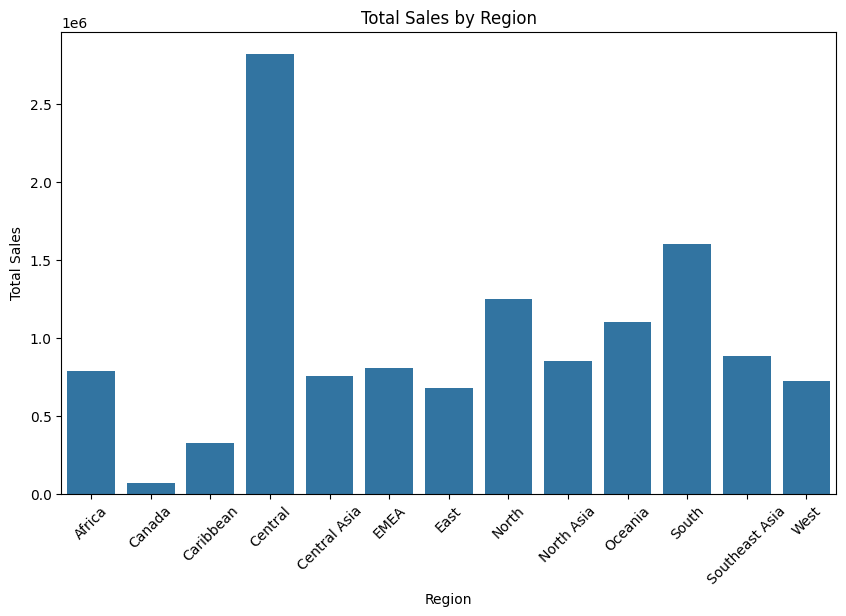

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_product_sales, estimator=sum, ci=None)
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()


C:\Users\Simon Ochieng'\AppData\Local\Temp\ipykernel_5048\1523098965.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=region_product_sales, estimator=sum, ci=None)


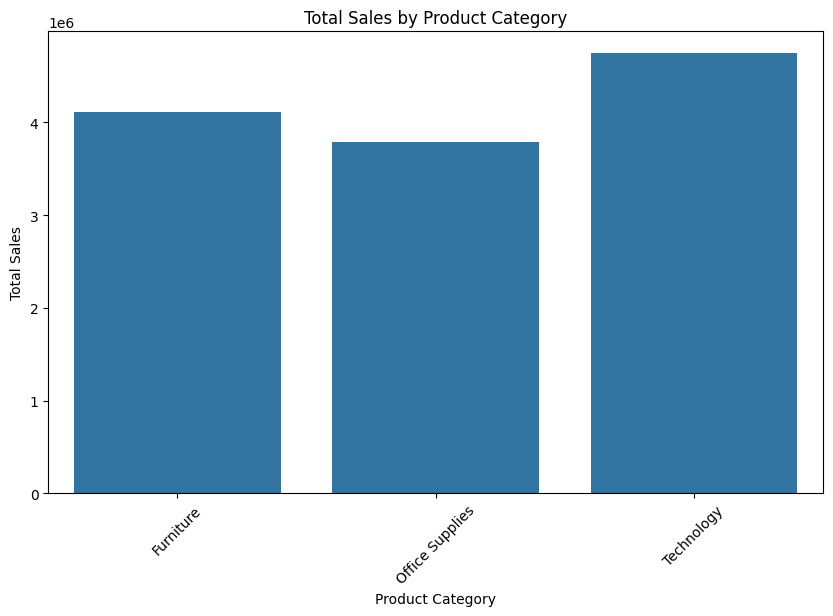

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=region_product_sales, estimator=sum, ci=None)
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


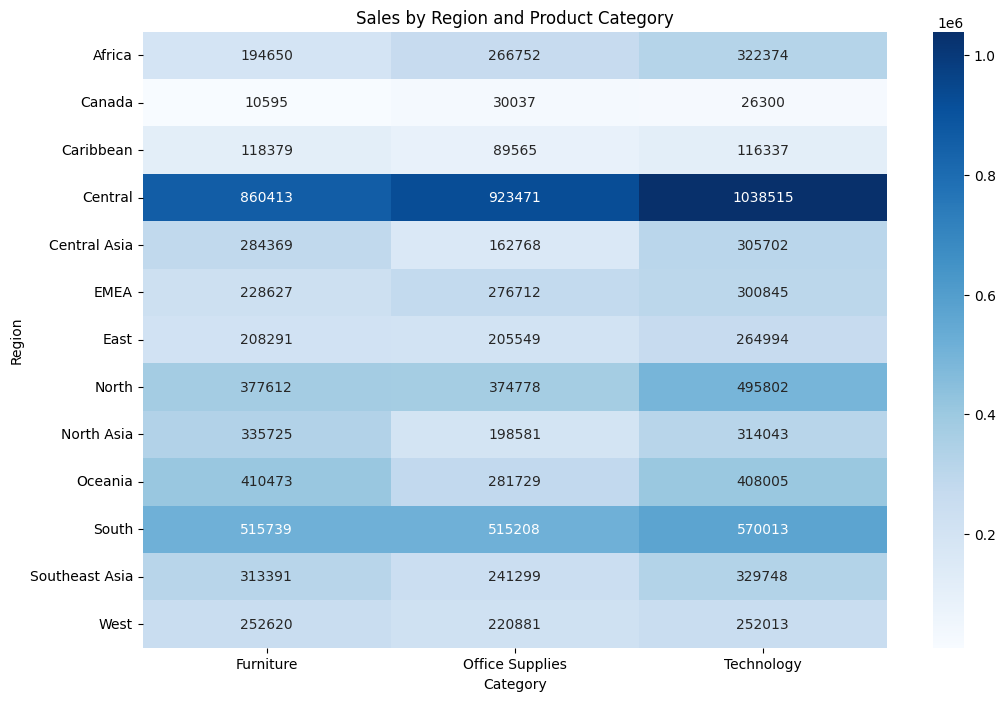

In [19]:
pivot_table = region_product_sales.pivot(index='Region', columns='Category', values='Sales')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='Blues')
plt.title('Sales by Region and Product Category')
plt.show()
